In [ ]:
pip install wordcloud

In [ ]:
from Resultive import lin_messages, tim_messages, dataset, len_vk, len_tg, lin_string, tim_string, df1, df_months, len_messages
from parser_vk import all_audios_vk, all_walls_vk, all_photos_vk, all_calls_vk
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from pandas.plotting import register_matplotlib_converters

### Нарисуем круговую диаграмму распределения сообщений в зависимости от автора

In [ ]:
lins = len(lin_messages)
tims = len(tim_messages)
labels = ['Лин', 'Тим']
values = [len(lin_messages), len(tim_messages)]
text_labels = ['Лин (' + str(lins) + ')', 'Тим (' + str(tims) + ')']

fig7, ax7 = plt.subplots()
colors =  ['#ffdd67', '#00a79d']
wedges, texts, autotexts = ax7.pie(values, autopct='%1.2f%%', colors=colors)
plt.title('Общее количество сообщений')
ax7.axis('equal')
ax7.legend(loc='upper left', bbox_to_anchor=(0.8, 0.9), labels=text_labels);
#plt.show()

## Нарисуем круговую диаграмму по распределению сообщений между соцсетями


In [ ]:
labels = ['Вконтакте', 'Телеграм']
colors = ['#4f81c7', '#64c4ed']
values = [len_vk, len_tg]
text_labels = ['Вконтакте (' + str(len_vk) + ')', 'Телеграм (' + str(len_tg) + ')']
fig2, ax2 = plt.subplots()
wedges, texts, autotexts = ax2.pie(values, autopct='%1.2f%%', colors=colors)
plt.title('Сообщения по соцсетям')
ax2.axis('equal')
ax2.legend(loc='upper left', bbox_to_anchor=(0.8, 0.8), labels=text_labels);

# Функция, генерирующая облако наиболее употребляемых слов

In [28]:
def generate_wordcloud(text, author): # optionally add: stopwords=STOPWORDS and change the arg below
    wordcloud = WordCloud(max_words=85, background_color='white', max_font_size=48,
                          min_font_size=12,
                          relative_scaling = 0.5,
                          stopwords = {'очень', 'это', 'ну', "буду", "да", "не",
                                       'когда', "есть", "зачем", "без",
                                       "как", "мне", "уже", "ещё", "так", "или", "и",
                                       "если", "по", "от", "вот", "надо",
                                       "все", "но", "его", "за", "же", "что", "будет", "что-то", "пока",
                                       "тут", "она", "тоже", "там", "то", "на", "можно", "из","до", "какое", "всё",
                                       "чем", "был", "было", "их", "для", "ли", "ты", "тебе", "бы", "такой", "он", "тогда",
                                       "про", "себя", "куда", "него", "даже", "была", "потому", "где", "еще",
                                       "чтоб", "себе", "какие", "чего", "два", "раз", "под",  "сколько",
                                       "они", "кто", "только", "потом", "хотя", "ага", "кто", "какой", "меня", "reassigned to"} # set or space-separated string
                          ).generate(text)
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title("Наиболее употребляемые слова" + author)


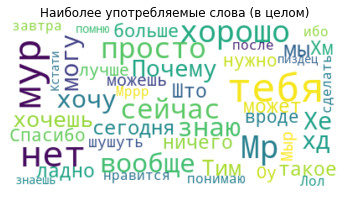

In [29]:
generate_wordcloud(all_string, all)


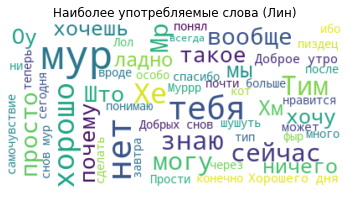

In [30]:
generate_wordcloud(lin_string, Lin)



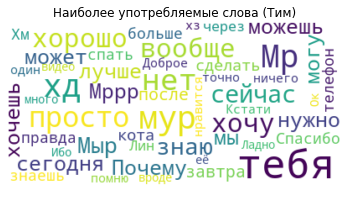

In [31]:
generate_wordcloud(tim_string, Tim)

# выведем распределение нетекстовых сообщений ВКонтакте


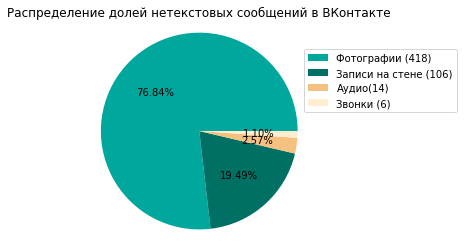

In [49]:
colors =  [ '#00a79d', '#007065', "#f5c181",   "#ffeecf",]
labels = ["Фотографии",  'Записи на стене', 'Аудио', "Звонки"]
values = [all_photos_vk,  all_walls_vk, all_audios_vk,  all_calls_vk]
text_labels = ['Фотографии (' + str(all_photos_vk) + ')', 'Записи на стене (' + str(all_walls_vk) + ')',
               'Аудио(' + str(all_audios_vk) + ')', 'Звонки (' + str(all_calls_vk) + ')',]
fig1, ax1 = plt.subplots()
wedges, texts, autotexts = ax1.pie(values, autopct='%1.2f%%', colors = colors)
plt.title('Распределение долей нетекстовых сообщений в ВКонтакте')
ax1.axis('equal')
ax1.legend(loc='upper left', bbox_to_anchor=(0.8, 0.9), labels=text_labels);


# построим гистограмму количества сообщений по дням

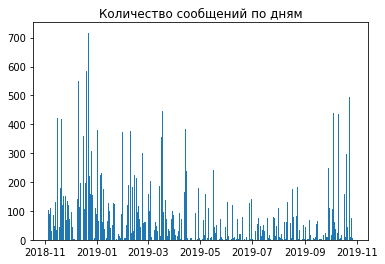

In [50]:
fig2, ax2 = plt.subplots()
ax2.bar(df1.index, df1['all'], label='количество сообщений')
plt.title('Количество сообщений по дням');

## построим гистограмму количества сообщений по месяцам (в целом)


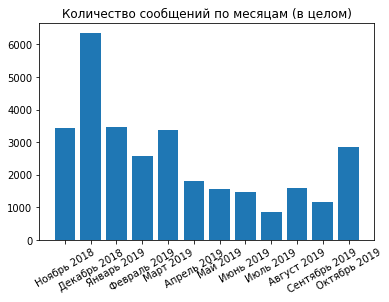

In [45]:
fig3, ax3 = plt.subplots();
ax3.bar(df_months.index, df_months['all'], label='количество сообщений')
plt.title('Количество сообщений по месяцам (в целом)')
ax3.set_xticklabels(df_months.index, rotation=30);


## построим гистограмму количества моих сообщений по месяцам (в целом)

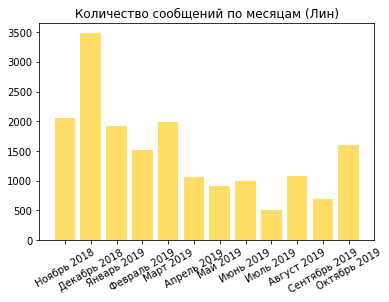

In [44]:
fig4, ax4 = plt.subplots()
ax4.bar(df_months.index, df_months['Lin'], label='количество сообщений', color='#ffdd67')
plt.title('Количество сообщений по месяцам (Лин)')
ax4.set_xticklabels(df_months.index, rotation=30);

## построим гистограмму количества твоих сообщений по месяцам (в целом)

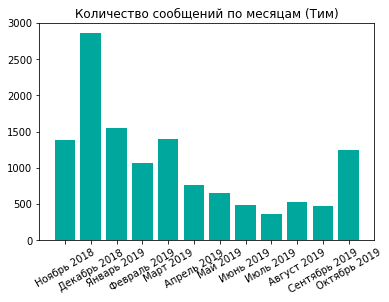

In [43]:
fig5, ax5 = plt.subplots()
ax5.bar(df_months.index, df_months['Tim'], label='количество сообщений', color= '#00a79d')
plt.title('Количество сообщений по месяцам (Тим)')
ax5.set_xticklabels(df_months.index, rotation=30);

## ну и совместим на одной


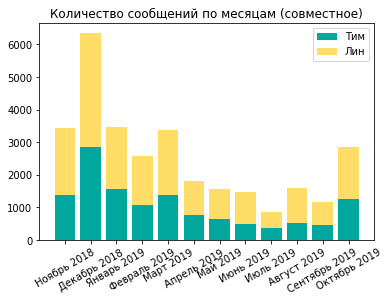

In [53]:
fig6, ax6 = plt.subplots()
ax6.bar(df_months.index, df_months['Tim'], label='Тим', color= '#00a79d' )
ax6.bar(df_months.index, df_months['Lin'], bottom=df_months['Tim'], label='Лин', color='#ffdd67')
plt.title('Количество сообщений по месяцам (совместное)')
ax6.set_xticklabels(df_months.index, rotation=30)
ax6.legend();